In [20]:
library(tidyverse)
library(gridExtra)
## define tamanho das figuras
options(repr.plot.width=6, repr.plot.height=4)

## População e amostra. Amostragem e inferência

> **População estatística**: todos os elementos que podem compor uma amostra. Podem ser medidas como comprimentos, temperaturas, velocidades, etc.

> **Unidade amostral**: um único elemento da população.
      
> **Censo**: o levantamento de *todos* os elementos da população.

> **Amostra**: um subconjunto extraído da população.
      
> **Tamanho populacional** (*N*): o número de elementos da população.
      
> **Tamanho amostral** (*n*): o número de elementos da amostra.

<img src="img/amostragem_inferencia.png" alt="Amostragem e inferência estatística" width="60%"/>

## Parâmetros e estimadores

> **Parâmetro**: a medida que descreve uma característica da *população*. Ex.: a média ($\mu$) ou a variância ($\sigma^2$) populacional.

> **Estimador** ou **Estatística**: Uma medida que descreve uma característica da *amostra*. Ex.: a média amostral ($\overline{X}$) ou a variância amostral ($s^2$).

> **Estimativa**: é o valor numérico assumido pelo estimador. Ex. o valor número da média ou variância amostral

### Medidas de tendência central: média aritimética

$$\mu=\frac{X_1+X_2+X_3+\cdots+X_N}{N}=\frac{\sum_{i=1}^N{X_i}}{N}$$

Quando nos referimos a uma amostra com **n** elementos, a média aritmética **amostral** ($\overline{X}$) é dada por:

$$\overline{X}=\frac{X_1+X_2+X_3+\cdots+X_n}{n}=\frac{\sum_{i=1}^n{X_i}}{n}$$

### Medidas de variação: variância, desvio padrão, desvio padrão

#### A variância e o desvio padrão populacional

$$\sigma^2=\frac{\sum_{i=1}^N{(X_i - \mu)^2}}{N}$$

$$\sigma=\sqrt{\frac{\sum_{i=1}^N{(X_i - \mu)^2}}{N}}$$


#### A variância e o desvio padrão amostral

$$s^2=\frac{\sum_{i=1}^N{(X_i - \overline{X})^2}}{n-1}$$

$$s=\sqrt{\frac{\sum_{i=1}^N{(X_i - \overline{X})^2}}{n-1}}$$

In [2]:
x = c(5.0, 4.1, 6.6, 4.5, 4.9, 7.7, 4.0, 5.0, 7.0, 7.9)

In [3]:
n = length(x)
xb = mean(x)
xb

[1] 5.67

In [4]:
var_a = sum((x - xb)^2)/(n - 1)
var_a
desv_a = sqrt(var_a)
desv_a

[1] 2.204556

[1] 1.484775

In [5]:
sd(x)

[1] 1.484775

## Modelos probabilísticos e distribuições de frequência

### O modelo normal de probabilidade

$$f(x) = \frac{1}{\sqrt(2\pi\sigma^2)}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

$$X \sim \mathcal{N}(\mu,\,\sigma^2)$$

In [6]:
mi = 10
sg = 2
x = c(4, 10)
fx = (1/(sqrt(2 * pi * sg^2))) * exp((-1/2) * ((x - mi)/sg)^2)
fx

[1] 0.002215924 0.199471140

In [7]:
x = seq(1, 2.1, 0.01)
fx = dnorm(x, mean = 1.68, sd = 0.10)


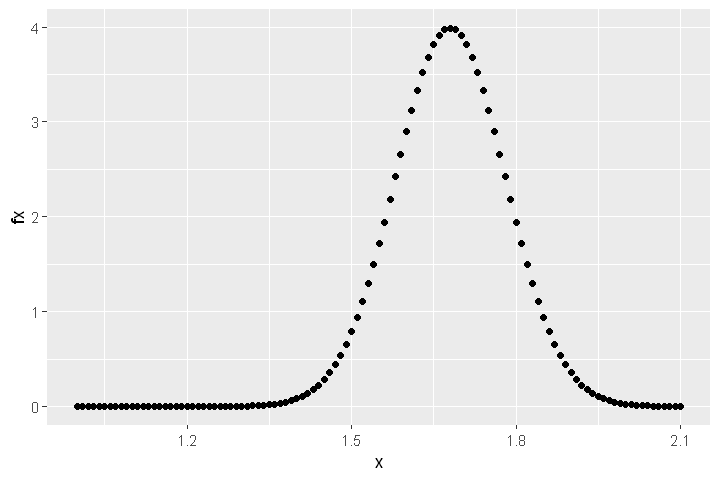

In [8]:
ggplot(data.frame(x = x, fx = fx)) +
    geom_point(aes(x, fx))

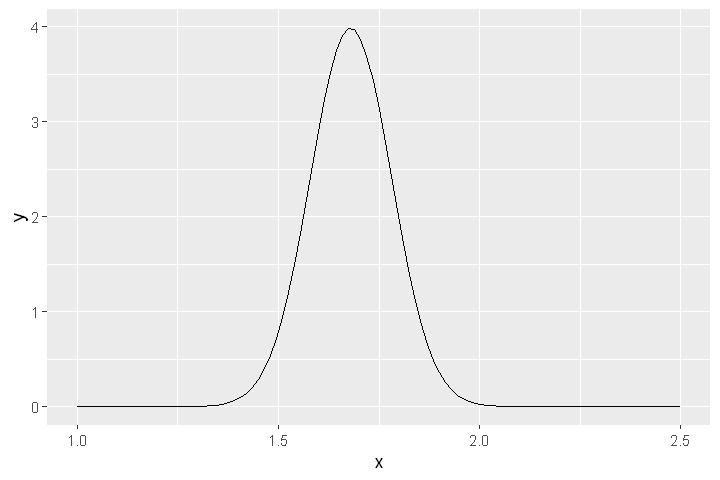

In [9]:
ggplot(data.frame(x = c(1,2.5))) +
  stat_function(aes(x = x), fun = dnorm,
               args = list(mean = 1.68, sd = 0.1))

### Alguns (vários) fenômenos podem ser descritos por um modelo normal

In [10]:
ie = read.csv("datasets/IE_BICT_2019.csv", sep = ";", dec = ',')
dim(ie)

temp <- data.frame(tm = datasets::nhtemp)
dim(temp)

[1] 139   2

[1] 60  1

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


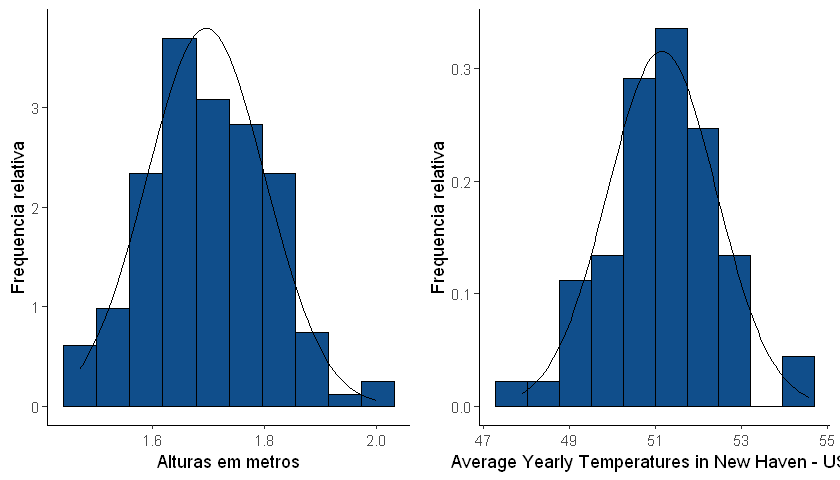

In [11]:
alt_plt <- ggplot(ie, aes(x = Altura)) +
   geom_histogram(aes(y =..density..), 
                  fill = 'dodgerblue4', color = 'black', bins = 10) +
   stat_function(fun = dnorm, args = list(mean = mean(ie$Altura, na.rm = T),
                                          sd = sd(ie$Altura, na.rm = T))) +
   labs(x = "Alturas em metros",
        y = "Frequencia relativa") +
   theme_classic()

temp_plt <- ggplot(temp, aes(x = tm)) +
   geom_histogram(aes(y =..density..),
                  fill = 'dodgerblue4', color = 'black', bins = 10) +
   stat_function(fun = dnorm, args = list(mean = mean(temp$tm, na.rm = T),
                                          sd = sd(temp$tm, na.rm = T))) +
   labs(x = "Average Yearly Temperatures in New Haven - USA",
        y = "Frequencia relativa") +
   theme_classic()

options(repr.plot.width=7, repr.plot.height=4)
grid.arrange(alt_plt, temp_plt, ncol = 2)

### Fazendo predições com o modelo normal

Qual a probabilidade de encontrar *ao acaso* uma pessoa mais baixa que 1.80 m?

In [12]:
xb = mean(ie$Altura, na.rm = T)
dp = sd(ie$Altura, na.rm = T)
xb; dp

[1] 1.696304

[1] 0.1050483

In [13]:
px = pnorm(1.80, mean = xb, sd = dp, lower.tail = TRUE)
px

[1] 0.8382089

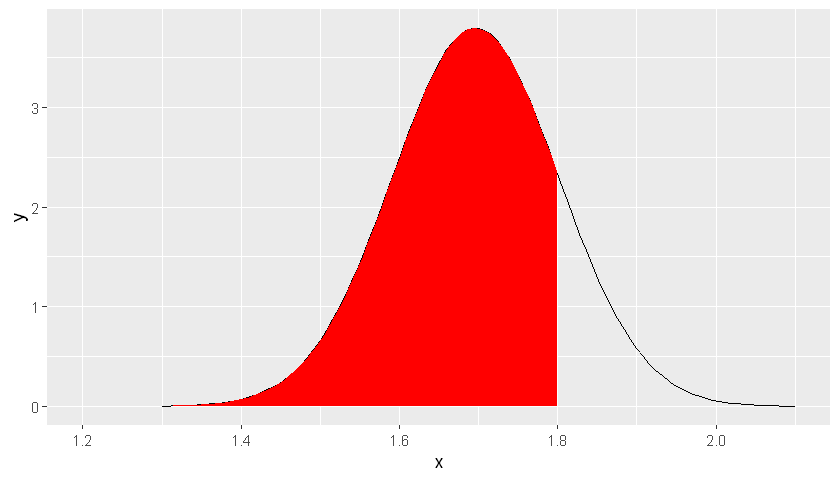

In [14]:
ggplot(data.frame(x = c(1.3, 2.1))) +
  stat_function(aes(x = x), fun = dnorm,
               args = list(mean = xb, sd = dp)) +
  geom_area(stat = 'function', fun = dnorm, fill = 'red',
            args = list(mean = xb, sd = dp),
            xlim = c(1.2, 1.8))

## Amostrando uma população estatística
### O Teorema Central do Limite

<p float="left">
    <img src="img/amostragem_inferencia_2.png" alt="Amostragem e inferência estatística" width="80%"/>
    <img src="img/amostragem_inferencia_3.png" alt="Amostragem e inferência estatística" width="80%"/>
</p>

> DEFINIÇÃO DO TCL: Seja uma popuilação estatística com média $\mu$ e desvio padrão $\sigma$. A distribuição das médias amostrais desta população tenderá a apresentar uma distribuição normal de probabilidades com média $\mu$ e desvio padrão $\frac{\sigma}{\sqrt(n)}$ à medida que o tamanho amostral $n$ aumenta, ainda que a dsitribuição das observações originais **não possua** uma distribuição normal.

Segundo o TCL, as médias amostrais $\overline{X}$ de um experimento distribuem-se como:

$$\overline{X} \sim \mathcal{N}(\mu_{\overline{X}},\,\sigma^{2}_{\overline{X}})$$

em que 
$$\mu_{\overline{X}} = \mu$$ $$\sigma^{2}_{\overline{X}} = \frac{\sigma^2}{n}$$

## Inferência estatística: o intervalo de confiança

> DEFINIÇÃO: é um intervalo de valores associado a um determinado nível de significância ($\alpha$). Quando dizemos que um intervalo foi calculado a um nível de confiança de 95%  ($1 - \alpha$), estamos dizendo que a probabilidade dos limites do IC conterem o valor da média populacional $\mu$ é de 95%.

#### Distribuiçao t de Student

Quando não conhecemos $\mu$ e $\sigma$ e as amostras são pequenas (ex. $n<30$), a dsitribuiçao normal não é a melhor aproximação para o comportamento das médias amostrais. Nestes casos, substituímos a distribuição normal pela **Distribuição $t$ de Student**, sendo o intervalo de confiança obtido por:

$$IC_{1-\alpha} = \overline{X} \pm t_{\alpha/2, gl} \times \frac{s}{\sqrt{n}}$$

Em que $\alpha$ continua sendo o nível de significância e $gl$ é definido como os **graus de liberdade**. Neste caso, os graus de liberdade são dados por:

$$gl = n-1$$

In [15]:
x = c(1.97, 1.83, 1.62, 1.77, 1.63, 1.68, 1.63, 1.68, 1.69, 1.85)
(xb = mean(x))
(sd = sd(x))
(n = length(x))

[1] 1.735

[1] 0.1164522

[1] 10

In [16]:
alfa = 0.05
t = qt(1-alfa/2, df = n - 1)
t

[1] 2.262157

In [17]:
(IC_sup = xb + t * sd/sqrt(n))
(IC_sup = xb - t * sd/sqrt(n))

[1] 1.818305

[1] 1.651695

[1] 0.262

[1] 0.184

[1] 0.022

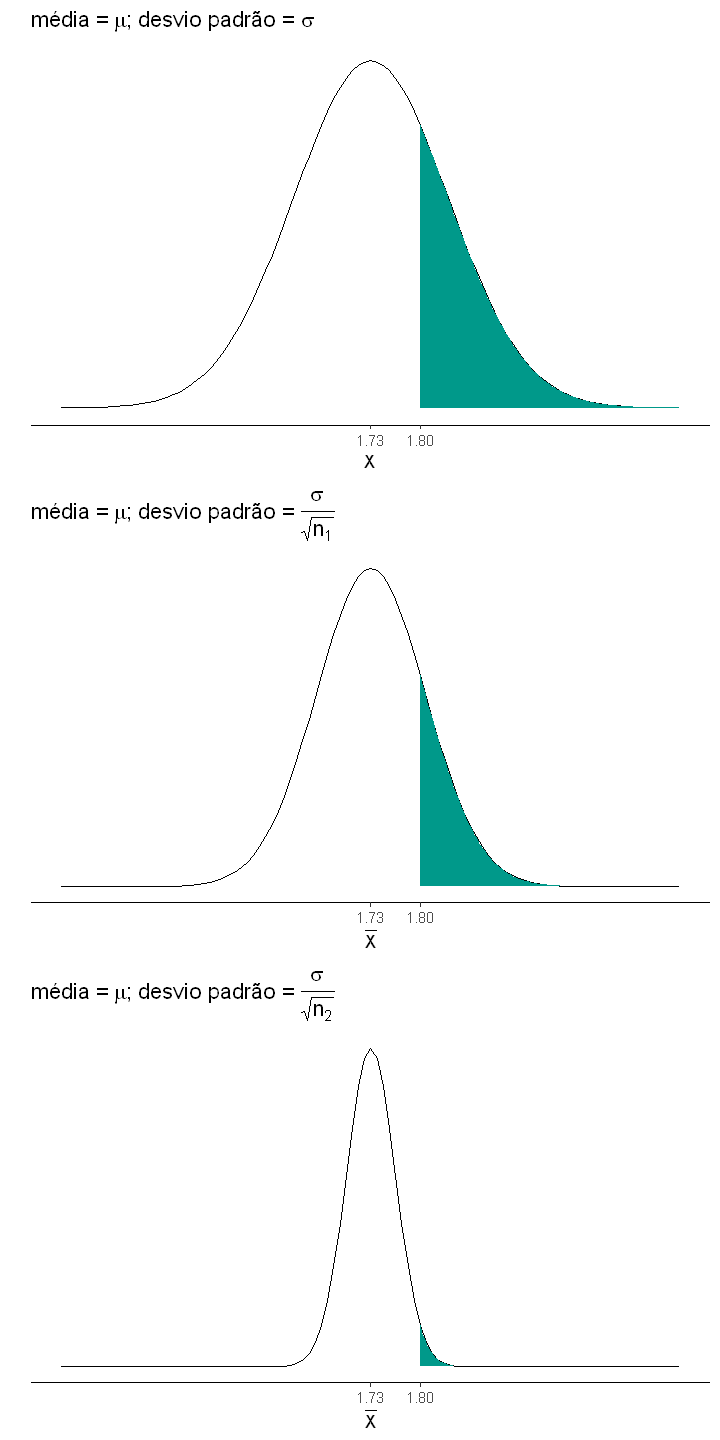

In [18]:
muX = round(xb,2)
sigmaX = round(dp,2)
x1 <- 1.8
n1 <- 2
n2 <- 10

tam <- 20
lim_x <- muX + c(-4,4) * sigmaX
exprx <- expression(
   paste('média = ', mu, '; desvio padrão = ', sigma))
expr1 <- expression(
   paste('média = ', mu, '; desvio padrão = ', frac(sigma, sqrt('n'["1"]))))
expr2 <- expression(
   paste('média = ', mu, '; desvio padrão = ', frac(sigma, sqrt('n'["2"]))))

p1 <- ggplot(data.frame(x = lim_x), aes(x = x)) +
  stat_function(fun = dnorm,
                args = list(mean = muX,
                            sd = sigmaX)) +
   geom_area(stat = "function", fun = dnorm,
             args = list(mean = muX,
                         sd = sigmaX),
             fill = "#00998a", 
             xlim = c(x1, lim_x[2])) +
   labs(x = "X", y = "") +
   scale_y_continuous(breaks = NULL) +
   scale_x_continuous(breaks = c(muX, x1)) +
   theme(axis.text.x = element_text(size = tam),
         axis.title.x = element_text(size = tam),
         plot.title = element_text(hjust = 0.5, size = tam)) +
   ggtitle(exprx) +
   theme_classic()

p2 <- ggplot(data.frame(x = lim_x), aes(x = x)) +
  stat_function(fun = dnorm,
                args = list(mean = muX,
                            sd = sigmaX/sqrt(n1))) +
   geom_area(stat = "function", fun = dnorm,
             args = list(mean = muX,
                         sd = sigmaX/sqrt(n1)),
             fill = "#00998a", 
             xlim = c(x1, lim_x[2])) +
   labs(x = expression(bar("X")), y = "") +
   scale_y_continuous(breaks = NULL) +
   scale_x_continuous(breaks = c(muX, x1)) +
   theme(axis.text.x = element_text(size = tam),
         axis.title.x = element_text(size = tam),
         plot.title = element_text(hjust = 0.5, size = tam)) +
   ggtitle(expr1) +
   theme_classic()

p3 <- ggplot(data.frame(x = lim_x), aes(x = x)) +
  stat_function(fun = dnorm,
                args = list(mean = muX,
                            sd = sigmaX/sqrt(n2))) +
   geom_area(stat = "function", fun = dnorm,
             args = list(mean = muX,
                         sd = sigmaX/sqrt(n2)),
             fill = "#00998a", 
             xlim = c(x1, lim_x[2])) +
   labs(x = expression(bar("X")), y = "") +
   scale_y_continuous(breaks = NULL) +
   scale_x_continuous(breaks = c(muX, x1)) +
   theme(axis.text.x = element_text(size = tam),
         axis.title.x = element_text(size = tam),
         plot.title = element_text(hjust = 0.5, size = tam)) +
   ggtitle(expr2) +
   theme_classic()

options(repr.plot.width=6, repr.plot.height=12)
pn <- grid.arrange(p1,p2,p3, ncol = 1)

(area <- round(pnorm(x1, mean = muX, sd = sigmaX, lower.tail = F), 3))
(area1 <- round(pnorm(x1, mean = muX, sd = sigmaX/sqrt(n1), lower.tail = F), 3))
(area2 <- round(pnorm(x1, mean = muX, sd = sigmaX/sqrt(n2), lower.tail = F), 3))


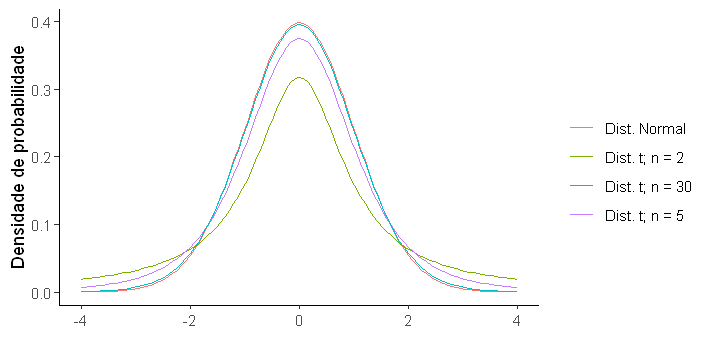

In [19]:
options(repr.plot.width=6, repr.plot.height=3)
n1 <- 2
n2 <- 5
n3 <- 30
ggplot(data = data.frame(x = c(-4,4)),
       mapping = aes(x = x)) +
  stat_function(mapping = aes(color = "Dist. Normal"),
                fun = dnorm) +
  stat_function(mapping = aes(color = paste("Dist. t; n =",n1)),
                fun = dt,
                args = list(df = n1-1)) +
  stat_function(mapping = aes(color = paste("Dist. t; n =",n2)),
                fun = dt,
                args = list(df = n2-1)) +
  stat_function(mapping = aes(color = paste("Dist. t; n =",n3)),
                fun = dt,
                args = list(df = n3-1)) +
  labs(colour = "", y = "Densidade de probabilidade", x = "") +
  theme_classic()

# Leitura

1. Princípios de Estatística em Ecologia. 
 + Capítulo 2. Tópico: **Variável aleatória normal**
 + Capítulo 3. **Inteiro**
 + Capítulo 4. **Inteiro**

#### Para a próxima aula

1. Princípios de Estatística em Ecologia. 
 + Capítulo 5. Três Estruturas para Análises Estatísticas. **Inteiro**
 + Capítulo 6. Delineando Estudos de Campo com Sucesso. **Inteiro**
 + Capítulo 6. Um Bestiário de Delçineamentos Experimentais e Amostrais. **Inteiro** 